In [1]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

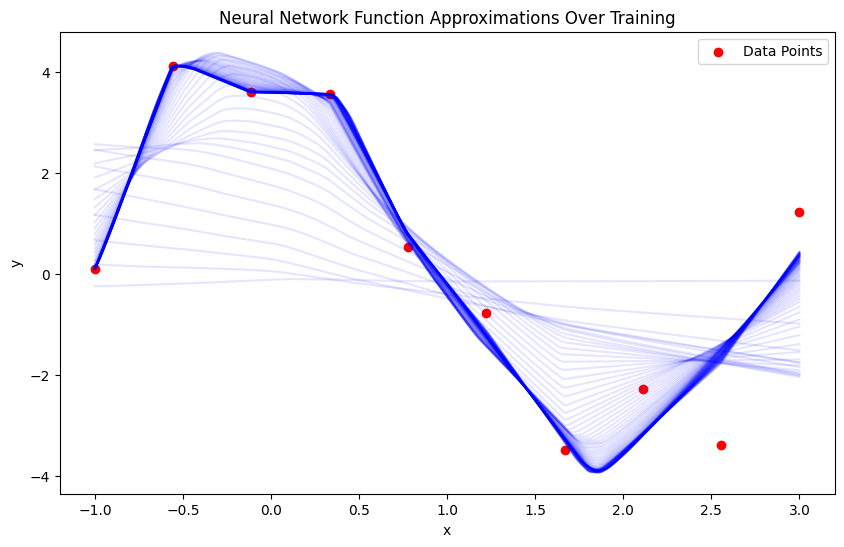

In [26]:
# generate a polynomial dataset
x = np.linspace(-1, 3, 10)
y = x**3 - 3 * x**2 - x + 3 + np.random.normal(0, 1, size=x.shape)
xf = np.linspace(-1, 3, 1000)

# fit a neural network to the data
model = torch.nn.Sequential(
    torch.nn.Linear(1, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 1)
)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

learned_funcs = []
for epoch in range(1000):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()
    with torch.no_grad():
        learned_func = model(torch.tensor(xf, dtype=torch.float32).unsqueeze(1)).numpy().flatten()
        learned_funcs.append(learned_func)

learned_funcs = np.array(learned_funcs)
# plot the results
plt.figure(figsize=(10, 6))
for i in range(0, learned_funcs.shape[0], 10):
    plt.plot(xf, learned_funcs[i], color='blue', alpha=0.1)
plt.scatter(x, y, color='red', label='Data Points')
plt.title('Neural Network Function Approximations Over Training')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# save data points and learned functions
np.save('nn_poly_data_points.npy', np.vstack([x, y]).T)
np.save('nn_poly_learned_functions.npy', learned_funcs)

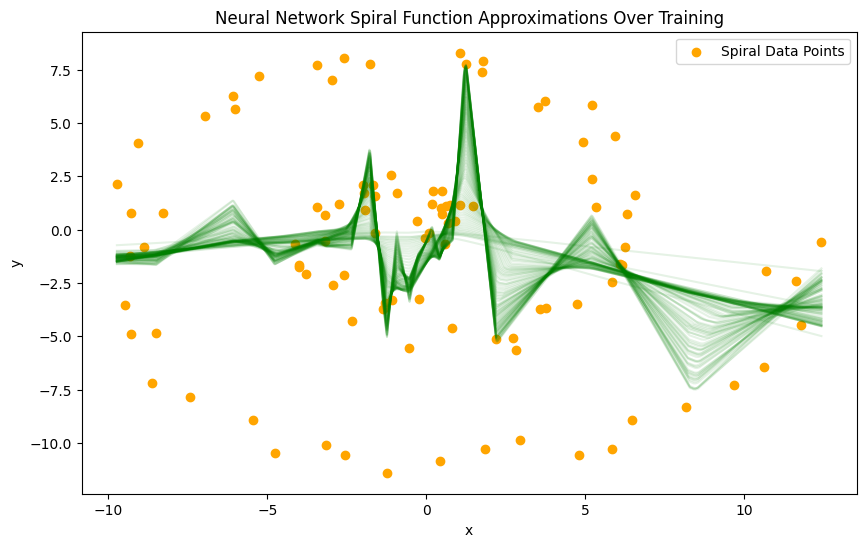

In [15]:
# generate a spiral dataset
t = np.linspace(0, 4 * np.pi, 100)
x_spiral = t * np.cos(t) + np.random.normal(0, 0.5, size=t.shape)
y_spiral = t * np.sin(t) + np.random.normal(0, 0.5, size=t.shape)
xf = np.linspace(x_spiral.min(), x_spiral.max(), 1000)

# fit a neural network to the spiral data
model_spiral = torch.nn.Sequential(
    torch.nn.Linear(1, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 1)
)
criterion_spiral = torch.nn.MSELoss()
optimizer_spiral = torch.optim.Adam(model_spiral.parameters(), lr=0.001)
x_tensor = torch.tensor(x_spiral, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y_spiral, dtype=torch.float32).unsqueeze(1)
learned_spirals = []
for epoch in range(1000):
    model_spiral.train()
    optimizer_spiral.zero_grad()
    outputs_spiral = model_spiral(x_tensor)
    loss_spiral = criterion_spiral(outputs_spiral, y_tensor)
    loss_spiral.backward()
    optimizer_spiral.step()
    with torch.no_grad():
        learned_spiral = model_spiral(torch.tensor(xf, dtype=torch.float32).unsqueeze(1)).numpy().flatten()
        learned_spirals.append(learned_spiral)

learned_spirals = np.array(learned_spirals)
# plot the spiral results
plt.figure(figsize=(10, 6))
for i in range(0, learned_spirals.shape[0], 10):
    plt.plot(xf, learned_spirals[i], color='green', alpha=0.1)
plt.scatter(x_spiral, y_spiral, color='orange', label='Spiral Data Points')
plt.title('Neural Network Spiral Function Approximations Over Training')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# save spiral data points and learned functions
np.save('nn_spiral_data_points.npy', np.vstack([x_spiral, y_spiral]).T)
np.save('nn_spiral_learned_functions.npy', learned_spirals)